<a href="https://colab.research.google.com/github/nilamaula26/Praktikum-Kuliah/blob/main/Linear_Regression_Laporan_PKL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error as mse, r2_score as r2
dataset= pd.read_csv("/content/data_bencana.csv")
dataset.head()

,max_hujan,banyak_bencana
0,736.0,0
1,803.0,1
2,977.0,6
3,723.0,3
4,700.0,4


In [2]:
print("Jumlah dataset saya: "+str(len(dataset.index)))

Jumlah dataset saya: 15


In [3]:
dataset.describe()

,max_hujan,banyak_bencana
count,15.000000,15.00000
mean,806.608667,2.00000
std,122.800939,2.44949
min,700.000000,0.00000
25%,745.250000,0.00000
50%,765.000000,1.00000
75%,787.315000,3.00000
max,1167.000000,8.00000


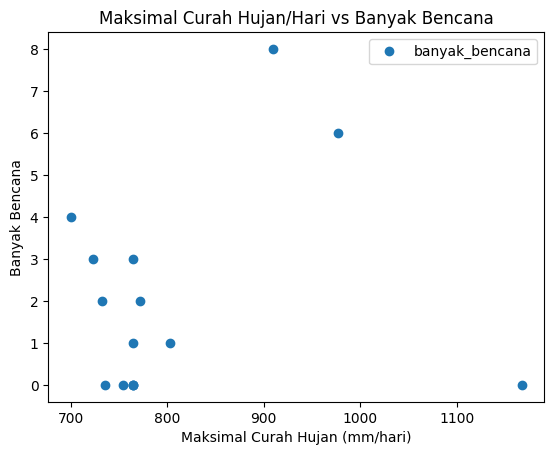

In [4]:
dataset.plot(x='max_hujan', y='banyak_bencana', style='o')
plt.title('Maksimal Curah Hujan/Hari vs Banyak Bencana')
plt.xlabel('Maksimal Curah Hujan (mm/hari)')
plt.ylabel('Banyak Bencana')
plt.show()

Penentuan variabel dan pembagian data

In [6]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x = scaler.fit_transform(x)

In [8]:
regressor = LinearRegression()

In [19]:
cv = KFold(n_splits=3, random_state=1, shuffle=True)
for train_index, test_index in cv.split(x):
    x_train, x_test, y_train, y_test = x[train_index], x[test_index], y[train_index], y[test_index]

In [20]:
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [21]:
regressor.fit(x_train, y_train)

LinearRegression()

In [22]:
y_pred = regressor.predict(x_test)

In [23]:
print(regressor.intercept_)

0.5652895958902922


In [24]:
print(regressor.coef_)

[9.89959282]


In [25]:
dataframe = pd.DataFrame({'Data Sebenarnya': y_test, 'Data Prediksi': y_pred})
dataframe

,Data Sebenarnya,Data Prediksi
0,3,1.943177
1,2,2.083722
2,0,10.464882
3,1,1.943177
4,0,1.943177


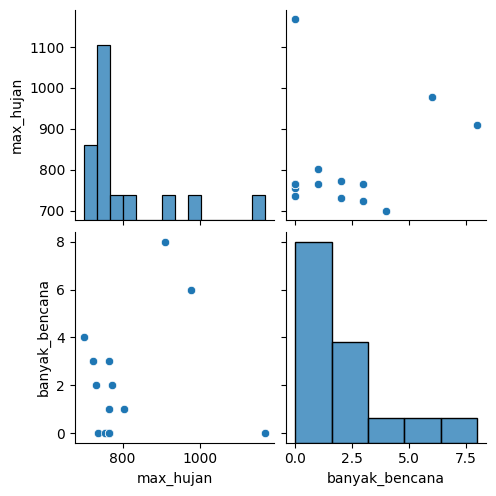

In [26]:
sns.pairplot(dataset)

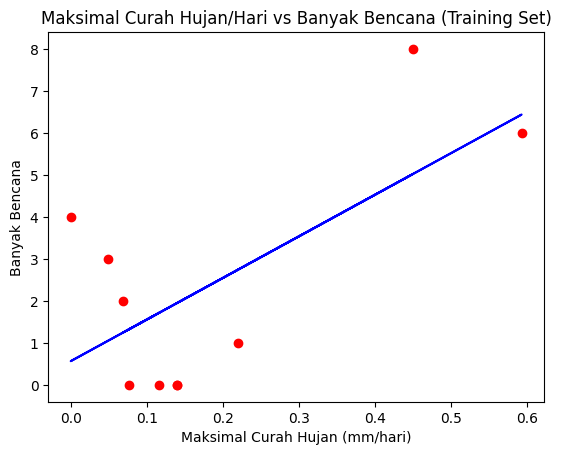

In [27]:
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, regressor.predict(x_train), color = 'blue')
plt.title('Maksimal Curah Hujan/Hari vs Banyak Bencana (Training Set)')
plt.xlabel('Maksimal Curah Hujan (mm/hari)')
plt.ylabel('Banyak Bencana')
plt.show()

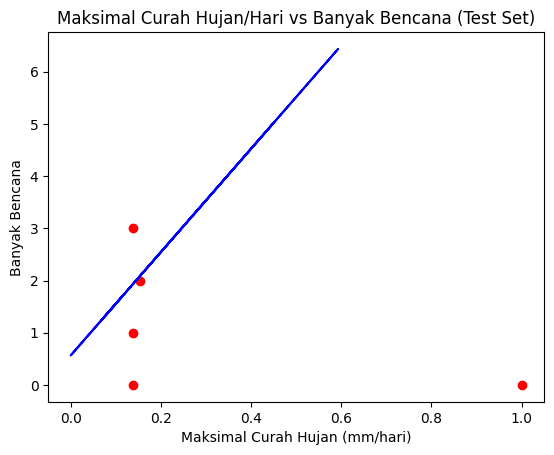

In [28]:
plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_train, regressor.predict(x_train), color = 'blue')
plt.title('Maksimal Curah Hujan/Hari vs Banyak Bencana (Test Set)')
plt.xlabel('Maksimal Curah Hujan (mm/hari)')
plt.ylabel('Banyak Bencana')
plt.show()